# Работа с текстом на естественном языке.


Пример работы word2vec

In [3]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

#lang_model = api.load("glove-twitter-25")
lang_model = api.load("glove-wiki-gigaword-100")

In [4]:
# king + (woman - man)
lang_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [5]:
lang_model.most_similar(positive=['russia', 'paris'], negative=['moscow'], topn=10)

[('france', 0.8784569501876831),
 ('french', 0.6961610317230225),
 ('britain', 0.6948201656341553),
 ('europe', 0.6841811537742615),
 ('belgium', 0.6787702441215515),
 ('spain', 0.6482120752334595),
 ('switzerland', 0.643441379070282),
 ('italy', 0.6415969729423523),
 ('germany', 0.6362987160682678),
 ('prohertrib', 0.6314049363136292)]

Сентиментальный анализ текста

In [6]:
import pandas as pd
import numpy as np

sentiment_ds = pd.read_csv('https://raw.githubusercontent.com/WiMLDS/election-data-hackathon/master/first-gop-debate-twitter-sentiment/data/Sentiment.csv')

In [7]:
sentiment_small = sentiment_ds[['sentiment', 'text']]
sentiment_small.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [8]:
pos_neg_sentiment = sentiment_small[sentiment_small.sentiment != 'Neutral']
pos_neg_sentiment.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


In [9]:
from pandas.api.types import CategoricalDtype

clean_sentiment_ds = pos_neg_sentiment.copy()
clean_sentiment_ds.sentiment = clean_sentiment_ds.sentiment.astype(CategoricalDtype(categories = ['Negative', 'Positive'], ordered=True)).cat.codes
clean_sentiment_ds.head()

,sentiment,text
1,1,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,1,RT @RobGeorge: That Carly Fiorina is trending ...
4,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,1,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,0,RT @warriorwoman91: I liked her and was happy ...


c:\Users\VivoBook\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

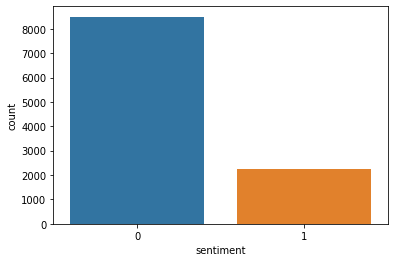

In [10]:
import seaborn as sns

sns.countplot(clean_sentiment_ds['sentiment'])

In [11]:
import re
reg = r'(?<!\w)@[\w+]{1,15}\b'
regRT = r'RT'
regWITH = r'w/'
regTHE = r'the'
regPOINTS = r':+'
regLINE = r'-+'
regQUOTES = r'"+'
regHASHTAG = r'(?<!\w)#[\w+]{1,15}\b'
regLINK = r'(?:https?:\/\/)?(?:[\w\.]+)\.(?:[a-z]{2,6}\.?)(?:\/[\w\.]*)*\/?'
regHTTP = r'http//'
regHTTPS = r'https//'
def convertText(text):
    # text=re.sub(reg, '', text, re.M)
    text=re.sub(regRT, '', text, re.M)
    text=re.sub(regWITH, '', text, re.M)
    text=re.sub(regPOINTS, '', text, re.M)
    # text=re.sub(regHASHTAG, '', text, re.M)
    # text=re.sub(regLINE, '', text, re.M)
    # text=re.sub(regTHE, '', text, re.M)
    # text=re.sub(regQUOTES, '', text, re.M)
    # text=re.sub(regLINK, '', text, re.M)
    # text=re.sub(regHTTP, '', text, re.M)
    # text=re.sub(regHTTPS, '', text, re.M)
    print(text)
    return text
clean_sentiment_ds['text'] = clean_sentiment_ds['text'].apply(lambda x: convertText(x))

 @ScottWalker Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http//t.co/ZSfF…
 @RobGeorge That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …
 @DanScavino #GOPDebate  @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http//t.co…
 @GregAbbott_TX @TedCruz "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews
 @warriorwoman91 I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https//…
Deer in the headlights  @lizzwinstead Ben Carson, may be the only brain surgeon who has performed a lobotomy on himself. #GOPDebate
 @NancyOsborne180 Last night's debate proved it! #GOPDebate #BATsAsk @BadassTeachersA #TBATs  https//t.co/G2gGjY1bJD
@JGreenDC @realDonaldTrump In all fairness #BillClinton owns that phrase

In [12]:
clean_sentiment_ds.head()

,sentiment,text
1,1,@ScottWalker Didn't catch the full #GOPdebate...
3,1,@RobGeorge That Carly Fiorina is trending -- ...
4,1,@DanScavino #GOPDebate @realDonaldTrump deli...
5,1,"@GregAbbott_TX @TedCruz ""On my first day I wi..."
6,0,@warriorwoman91 I liked her and was happy whe...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = clean_sentiment_ds['text']
sentiment = clean_sentiment_ds['sentiment']

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None, sublinear_tf=True, ngram_range=(1, 1))
embeddings = vectorizer.fit_transform(corpus)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, sentiment, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, plot_confusion_matrix, classification_report

In [16]:
model = LogisticRegression(penalty='l2', C=0.3, solver='lbfgs', max_iter=150, verbose=0, random_state=42)

In [17]:
model.fit(X_train, y_train)

c:\Users\VivoBook\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.3, max_iter=150, random_state=42)

In [18]:
print(classification_report(y_test, model.predict(X_test), zero_division='warn'))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1713
           1       0.68      0.55      0.61       433

    accuracy                           0.86      2146
   macro avg       0.79      0.74      0.76      2146
weighted avg       0.85      0.86      0.85      2146



1. Улучшить показатели precision, recall по 1.
2. Применить другие методы машинного обучения и сравнить результат.

Decision Tree:

In [19]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=15)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=15)

In [20]:
print(classification_report(y_test, model.predict(X_test), zero_division='warn'))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1713
           1       0.67      0.42      0.51       433

    accuracy                           0.84      2146
   macro avg       0.77      0.68      0.71      2146
weighted avg       0.83      0.84      0.83      2146



Neariest Neighboors:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [23]:
print(classification_report(y_test, pred_knn, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1713
           1       0.40      0.52      0.45       433

    accuracy                           0.75      2146
   macro avg       0.63      0.66      0.64      2146
weighted avg       0.77      0.75      0.76      2146

